In [1]:
import sys
sys.path.append("../")
from utils import transform_image_to_kspace, transform_kspace_to_image
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import pydicom

data_path = r'C:\from SSD\fastMRI_brain_DICOM\100099070170\279.dcm'
#data_path = r'C:\Users\simon\anaconda3\envs\drs\drs\Data\fastMRI_brain_DICOM\100099070170\308.dcm'
data = pydicom.dcmread(data_path)

image = data.pixel_array
if (np.shape(image) != (320, 320)):
    image = cv2.resize(image, (320, 320))

image = (image - np.mean(image)) / np.std(image)

kspace = transform_image_to_kspace(image)

In [2]:
def add_noise(kspace):
    """Adds random Guassian white noise to k-space
    Adds noise to the image to simulate an image with the given
    signal-to-noise ratio, so that SNR [dB] = 20log10(S/N)
    where S is the mean signal and N is the standard deviation of the noise.
    Parameters:
        kspace (np.ndarray): Complex kspace ndarray
        signal_to_noise (float): SNR in decibels (-30dB - +30dB)
        current_noise (np.ndarray): the existing noise map
        generate_new_noise (bool): flag to generate new noise map
    """
    signal_to_noise = random.randint(-30, 30)
    current_noise = np.zeros_like(image)
    if signal_to_noise < 30:
        mean_signal = np.mean(np.abs(kspace))
        std_noise = mean_signal / np.power(10, (signal_to_noise / 20))
        current_noise[:] = std_noise * np.random.randn(*kspace.shape)
    kspace += current_noise
    return kspace

In [3]:
# still inside function
kspace_noise = add_noise(kspace)

img = transform_kspace_to_image(kspace_noise)
img = (img - np.mean(img)) / np.std(img)

(-0.5, 319.5, 319.5, -0.5)

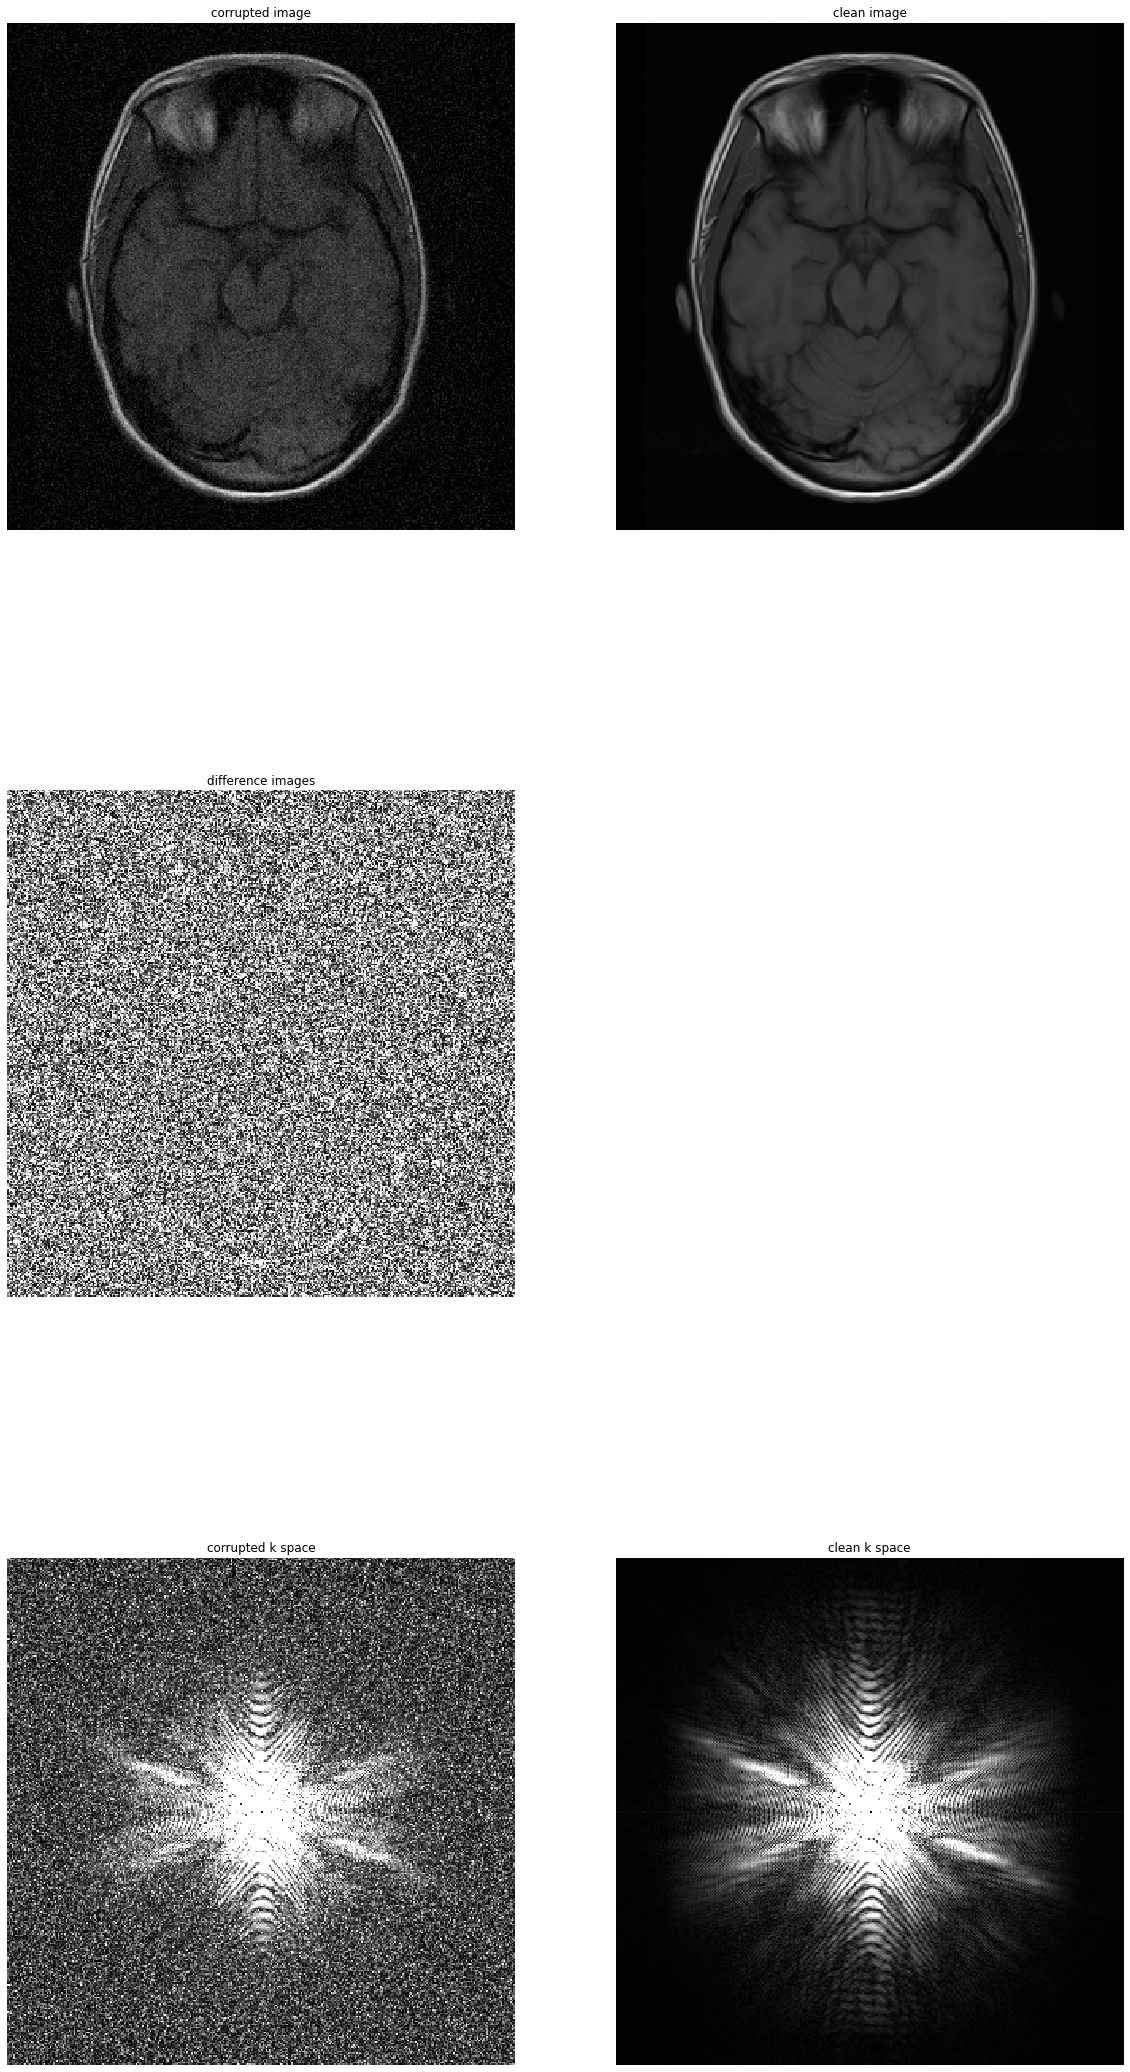

In [4]:
# plotting
hr = image
lr = img

k_lr = np.abs(transform_image_to_kspace(lr))
k_hr = np.abs(transform_image_to_kspace(hr))

k_lr = k_lr / np.max(np.abs(k_lr))
k_hr = k_hr / np.max(np.abs(k_hr))

lr = (lr - np.mean(lr)) / np.std(lr)
hr = (hr - np.mean(hr)) / np.std(hr)

vmx = np.max(hr)
vmn = np.min(hr)
dmx = 0.5
kmx = 0.01

fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(3, 2, 1)
ax.imshow(lr, interpolation='none', cmap='gist_gray', vmin=vmn, vmax=vmx)
ax.set_title("corrupted image")
ax.axis('off')
ax = fig.add_subplot(3, 2, 2)
ax.imshow(hr, interpolation='none', cmap='gist_gray', vmin=vmn, vmax=vmx)
ax.set_title("clean image")
ax.axis('off')
ax = fig.add_subplot(3, 2, 3)
ax.imshow(np.abs(lr - hr), interpolation='none', cmap='gist_gray', vmin=0, vmax=dmx)
ax.set_title("difference images")
ax.axis('off')
ax = fig.add_subplot(3, 2, 5)
ax.imshow(k_lr, interpolation='none', cmap='gist_gray', vmin=0, vmax=kmx)
ax.set_title("corrupted k space")
ax.axis('off')
ax = fig.add_subplot(3, 2, 6)
ax.imshow(k_hr, interpolation='none', cmap='gist_gray', vmin=0, vmax=kmx)
ax.set_title("clean k space")
ax.axis('off')